In [35]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()

In [36]:
import numpy as np
import h5py
from chainconsumer import ChainConsumer
from glob import glob
from os import path
from copy import deepcopy
from collections import OrderedDict

In [37]:
! ls -ltr ~/des/PearceMCMC/Vpeak*HOD.hdf5

-rw-r--r-- 1 swmclau2 des  690884158 Jun  8 23:29 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_2.0_HOD.hdf5
-rw-r--r-- 1 swmclau2 des 1237555483 Jul  7 19:25 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_1.0_HOD.hdf5
-rw-r--r-- 1 swmclau2 des  772087446 Jul  8 03:14 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_HOD.hdf5
-rw-r--r-- 1 swmclau2 des 1026564825 Jul  8 07:23 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_5.0_HOD.hdf5
-rw-r--r-- 1 swmclau2 des 1203449214 Jul  8 07:43 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_None_HOD.hdf5


In [38]:
fnames = []
models = ['HOD', 'HSAB', 'CAB', 'CorrAB']
for model in models:
    fn = sorted(glob('/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_*_%s.hdf5'%model)) 
    # put the None chain first instead of last 
    
    _fnames = []
    _fnames.extend(reversed(fn[:-1]) )
    _fnames.append(fn[-1])
    fn = _fnames
    
    fnames.extend(fn)

Assume all chains run with same true values, only thing that differs is the rmin. 

In [39]:
fnames

['/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_5.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_2.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_1.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_0.5_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_None_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_5.0_HSAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_2.0_HSAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_1.0_HSAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_0.5_HSAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_None_HSAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_5.0_CAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_2.0_CAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_1.0_CAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_0.5_CAB.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2

In [40]:
names_to_remove = []
for fname in fnames:
    if '2.0' in fname:
        names_to_remove.append(fname)
    #pass    
for fname in names_to_remove:
    fnames.remove(fname)

In [41]:
f = h5py.File(fnames[0], 'r')

In [42]:
f.attrs.keys()

[u'chain_fixed_params',
 u'cov',
 u'dlogz',
 u'emu_cov_fname',
 u'emu_hps',
 u'emu_type',
 u'fixed_params',
 u'mcmc_type',
 u'nburn',
 u'nlive',
 u'nsteps',
 u'nwalkers',
 u'obs',
 u'param_names',
 u'seed',
 u'sim',
 u'training_file',
 u'true_cov_fname',
 u'true_data_fname']

In [43]:
#sim_info = eval(f.attrs['sim'])
sim_info = f.attrs['sim']

In [44]:
f.close()

In [45]:
param_name_dict = {'ombh2': r'$\Omega_b h^2$', 'omch2': r'$\Omega_c h^2$','w0': r'$w_0$','ns': r'$n_s$', \
                   'sigma8': r'$\sigma_8$', 'ln10As':r'$\ln 10^{10} A_s$', 'H0': r'$H_0$','Neff': r'$N_{eff}$',\
               'mean_occupation_centrals_assembias_corr1': r'$\rho_{cen}$',\
                 'mean_occupation_satellites_assembias_corr1':r'$\rho_{sat}$',\
                   'mean_occupation_centrals_assembias_param1': r'$\mathcal{A}_{cen}$',\
                 'mean_occupation_satellites_assembias_param1':r'$\mathcal{A}_{sat}$',\
                   'mean_occupation_centrals_assembias_slope1': r'$\mathcal{B}_{cen}$',\
                 'mean_occupation_satellites_assembias_slope1':r'$\mathcal{B}_{sat}$',\
                   'logM1': r'$\log(M_1)$','logM0': r'$\log(M_0)$','sigma_logM': r'$\sigma_{\log M }$',
                   'conc_gal_bias': r'$\eta$', 'alpha':r'$\alpha$',
                  'Om': r'$\Omega_m$', 'S8': r'$S_8$'}

In [46]:
bounds_dict = {'H0': (61.69472, 74.76751999999999),
 'Neff': (2.62125, 4.27875),
 'alpha': (0.7, 1.3),
 'conc_gal_bias': (0.5, 2.0),
 'sigma8': (0.65, 1.0), # TODO update
 'logM0': (12.6, 13.6),
 'logM1': (13.7, 14.7),
 'ns': (0.9278462, 0.9974495999999999),
 'ombh2': (0.02066455, 0.02371239),
 'omch2': (0.1012181, 0.13177679999999997),
 'sigma_logM': (0.05, 0.5),
 'ln10As': (3.0, 3.1),
 'w0': (-1.399921, -0.5658486),
 'Om': (0.25, 0.35),
 'S8': (0.7, 1.0),
 'mean_occupation_centrals_assembias_corr1': (-1.0, 1.0),
 'mean_occupation_satellites_assembias_corr1': (-1.0, 1.0),
 'mean_occupation_centrals_assembias_param1': (-1.0, 1.0),
 'mean_occupation_satellites_assembias_param1': (-1.0, 1.0),
 'mean_occupation_centrals_assembias_slope1': (-3.0, 3.0),
 'mean_occupation_satellites_assembias_slope1': (-3.0, 3.0)}

In [47]:
### HOD ### 
from pearce.mocks import cat_dict
#cosmo_params = {'simname': sim_info['simname'], 'boxno': sim_info['sim_hps']['boxno'],\
#                'realization': sim_info['sim_hps']['realization'], 'scale_factors':[sim_info['scale_factor']],\
#                'system': 'ki-ls'}
cosmo_params = {'simname': 'testbox', 'boxno': 1,\
                'realization':1, 'scale_factors':[1.0],\
                'system': 'ki-ls'}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

cpv = cat._get_cosmo_param_names_vals()

cat_val_dict =  {key: val for key, val in zip(cpv[0], cpv[1])}

Om = (cat_val_dict['ombh2']+cat_val_dict['omch2'])/((cat_val_dict['H0']/100)**2)
S8 = cat_val_dict['sigma8']*np.sqrt(Om/0.3)
H0 = cat_val_dict['H0']

In [48]:
summary_names = ['Om','S8','H0']
true_vals_dict = dict(zip(summary_names, [Om, S8, H0]))
def_ab_val = 0.0

In [49]:
c = ChainConsumer()

In [50]:
def modify_chain(chain, param_names):
    new_pnames = ['Om', 'S8']
    h = chain[:,param_names.index('H0')]/100
    
    Omc, Omb = chain[:,param_names.index('omch2')]/(h**2), chain[:,param_names.index('ombh2')]/(h**2)
    Om = Omc+Omb
    
    S8 = chain[:,param_names.index('sigma8')]*np.sqrt(Om/0.3)

    new_chain = np.hstack([chain[:,:7], Om.reshape((-1,1)), S8.reshape((-1,1)), chain[:,7:]])
    param_names.insert(7, new_pnames[0])
    param_names.insert(8, new_pnames[1])

    return new_chain, param_names

In [51]:
true_Om, true_s8 = Om, S8

In [52]:
f = h5py.File(fname, 'r')

In [53]:
r = np.logspace(-1, 1.6, 19)
rbc = (r[1:]+r[:-1])/2.0

In [54]:
num_eff_dict = {5.0:np.sum(rbc>5.0)*2, 1.0:np.sum(rbc>1.0)*2, 0.5:np.sum(rbc>0.5)*2,\
0.1:np.sum(rbc>0.5)+np.sum(rbc>0.1)}

In [55]:
n_burn = 10000
plot_true_vals_dict = dict()
plot_bounds_dict = dict()
plot_param_names_set = set()
for fname in fnames:
    try:
        f = h5py.File(fname, 'r')
        n_walkers = f.attrs['nwalkers']

        chain = f['chain'][n_burn*n_walkers:]
        lnprob = f['lnprob'][n_burn*n_walkers:]
        keep_idxs = np.all(chain!=0.0, axis = 1)
        chain = chain[keep_idxs, :]
        lnprob = lnprob[keep_idxs]
    except IOError:
        print 'Error loading', fname
        #f.close()
        chain = np.random.randn(n_walkers, chain.shape[1])+10
        lnprob = np.ones((chain.shape[0],))*-np.inf
        #continue
    
    chain = chain.reshape((-1, n_walkers, chain.shape[1]))
    chain = chain.reshape((-1, chain.shape[2]), order = 'F')
    if chain.shape[0] == 0:
        print 'Insufficient samples in', fname
        #f.close()
        chain = np.random.randn(n_walkers, chain.shape[1])+10
        lnprob = np.zeros((chain.shape[0],))
        #continue
    
    #name = path.basename(fname).split('_')[-1].split('.')[0]
    split_fname = path.basename(fname).split('_')#[4]
    r = split_fname[-2] #[4]
    model = split_fname[-1][:-5]#[5]

    if r == "None":
        r = "0.1"
        
    if model == 'HOD':
        model = 'Std. HOD'
        
    name = r"%s $r_{min} = %s$"%(model, r)
    
    hod_param_names = []
    cosmo_param_names = []
    chain_pnames = list(f.attrs['param_names'])
    #cosmo_names = set(['ombh2', 'omch2', 'w0', 'ns', 'sigma8', 'H0', 'Neff', 'Om', 'S8'])
    chain, chain_pnames = modify_chain(chain, chain_pnames)
    summary_idxs = []
    param_names = []
    for i, pname in enumerate(chain_pnames):
        if pname in summary_names or ('mean_occupation' in pname and 'slope' not in pname):
            param_names.append(param_name_dict[pname])
            summary_idxs.append(i)
            plot_true_vals_dict[param_names[-1]] = true_vals_dict[pname] if pname in true_vals_dict else def_ab_val
            plot_bounds_dict[param_names[-1]] = bounds_dict[pname] 
            plot_param_names_set.add(param_names[-1])
    print fname
    N = 50000
    if chain.shape[0]/n_walkers > N:
        chain = chain[:N*n_walkers]
        lnprob = lnprob[:N*n_walkers]
    #print summary_idxs, param_names
    print chain.shape, chain.shape[0]/n_walkers, len(param_names)
    
    c.add_chain(chain[:, np.array(summary_idxs)], parameters=param_names,
                name = name, walkers = n_walkers, posterior = lnprob,
               num_eff_data_points = num_eff_dict[float(r)], num_free_params = len(param_names))
    f.close()


/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_5.0_HOD.hdf5
(12500000, 14) 50000 3
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_1.0_HOD.hdf5
(12500000, 14) 50000 3
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_0.5_HOD.hdf5
(12500000, 14) 50000 3
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_None_HOD.hdf5
(12500000, 14) 50000 3
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_5.0_HSAB.hdf5
(12500000, 16) 50000 5
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_1.0_HSAB.hdf5
(12500000, 16) 50000 5
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_0.5_HSAB.hdf5
(12500000, 16) 50000 5
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_None_HSAB.hdf5
(12500000, 16) 50000 5
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_5.0_CAB.hdf5
(12500000, 18) 50000 5
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_1.0_CAB.hdf5
(11790250, 18) 47161 5
/u/ki/swmclau2/des/PearceMCMC/HOD_MDPL2_wp_ds_rmin_0.5_CAB.hdf5
(12500000, 18) 50000 5
/u/ki/swmclau2/des/PearceMCMC/HOD_MDP

In [56]:
summary_pnames = list(plot_param_names_set)
summary_true_vals = [plot_true_vals_dict[pname] for pname in summary_pnames]
summary_bounds = [plot_bounds_dict[pname] for pname in summary_pnames]

In [57]:
palettes = []
for model in models:
    if model == 'HOD':
        #palette = sns.cubehelix_palette(len(fnames), start = 2.6, rot = 0.1, gamma = 0.7)
        palette = sns.cubehelix_palette(4, start = 2.6, rot = 0.1, gamma = 2.5)#,
                                        #light = 0.6)

    elif model == 'HSAB':
        palette = sns.cubehelix_palette(4, start = 2.0, rot = 0.1, gamma = 2.5)#,
                                        #light = 0.6)
        #palette = sns.cubehelix_palette(len(fnames), start = 1.2, rot = 0.6, gamma = 1.7)
    elif model == 'CAB':
        palette = sns.cubehelix_palette(4, start = 0.6, rot = 0.1, gamma = 2.5)# 
                                        #light = 0.6)
    elif model == 'CorrAB':
        #palette = sns.cubehelix_palette(len(fnames), start = 1.2, rot = 0.1, gamma = 1.2)
        palette = sns.cubehelix_palette(4, start = 1.2, rot = 0.1, 
                                        gamma = 2.5)
    else:
        palette = sns.cubehelix_palette(4, start = 2.6, rot = 0.1, 
                                        gamma = 2.5)
    palettes.append(palette)
#sns.palplot(palette)

In [58]:
def color_to_hex(color):
    return np.array(color)#*255

In [59]:
colors = []
for palette in palettes:
    for p in palette:
        colors.append(color_to_hex(p))
c.configure(colors = colors, shade = False, shade_alpha=0.2,\
            shade_gradient=1.0, bar_shade=True, plot_hists=False,
            diagonal_tick_labels=False, tick_font_size=8, label_font_size=25,
            max_ticks=8)

In [60]:
summary_pnames # ugh dont know a nice way to make sure these are sorted

['$\\rho_{sat}$',
 '$\\Omega_m$',
 '$\\mathcal{A}_{sat}$',
 '$\\rho_{cen}$',
 '$\\mathcal{A}_{cen}$',
 '$H_0$',
 '$S_8$']

In [61]:
#reorder_idxs = [3, 1, 0, 4, 2]
#reorder_idxs = [2, 6, 5, 4, 3, 1, 0]
reorder_idxs = [1, 6, 5, 4, 2, 3,0]

summary_pnames = [summary_pnames[i] for i in reorder_idxs]
summary_true_vals = [summary_true_vals[i] for i in reorder_idxs]
summary_bounds = [summary_bounds[i] for i in reorder_idxs]

In [63]:
from os.path import basename
split_fname = basename(fnames[-1]).split('_')
mock_name = split_fname[0]
#model_name = split_fname[-1].split('.')[0]

if mock_name == 'HOD':
    mock_name = 'Std. HOD'# Aemulus'
    
elif mock_name == 'VpeakSHAM':
    mock_name = 'SHAM'
elif mock_name == 'UniverseMachine':
    mock_name = 'UM'
    
if model_name == 'HOD':
    model_name = 'Std. HOD'

NameError: name 'model_name' is not defined

In [64]:
models = ['Std. HOD', 'HSAB', 'CAB', 'CorrAB']
deltas = np.zeros((4,len(models),2))
for i, model in enumerate(models):
    print model
    rmins = []

    for chain in c.chains:
        if chain.name[:len(model)] != model:
            continue
        for k, param in enumerate([r'$S_8$', r'$\Omega_m$']):
            summary = c.analysis.get_parameter_summary(chain, param)
            #try:
            delta = summary[2]-summary[0]
            deltas[len(rmins), i, k] = delta
        rmin = chain.name.split()[-1][:-1]
        rmins.append(float(rmin))
        
        print rmin, delta
    print 

Std. HOD
5.0 0.040325570518710385
1.0 0.03570255464975125
0.5 0.02809652888306513
0.1 0.029104073052315493

HSAB
5.0 0.04181126098442817
1.0 0.04251100084179804
0.5 0.040057832267784144
0.1 0.04030553611925525

CAB
5.0 0.042899137488719596
1.0 0.04007774706207856
0.5 0.03639796177851656
0.1 0.03564013343008776

CorrAB
5.0 0.05115668777571608
1.0 0.037352709340644
0.5 0.03299146679631848
0.1 0.03521500763701185



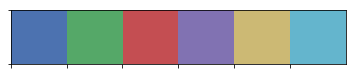

In [65]:
import seaborn as sns
sns.set_palette('deep')
current_palette = sns.color_palette()
sns.palplot(current_palette)
model_color_map = {'Std. HOD': (current_palette[0], "GnBu_d"),
                    'HSAB': (current_palette[1], "YlGn_d"),
                   'SHAM': (current_palette[2], "OrRd_d"),
                   'CAB': (current_palette[3], "RdPu_d"),
                   'CorrAB': (current_palette[4], "YlOrBr_d"),
                    'Halos': (current_palette[5], 'PuBu_d')} # add CMAPs too

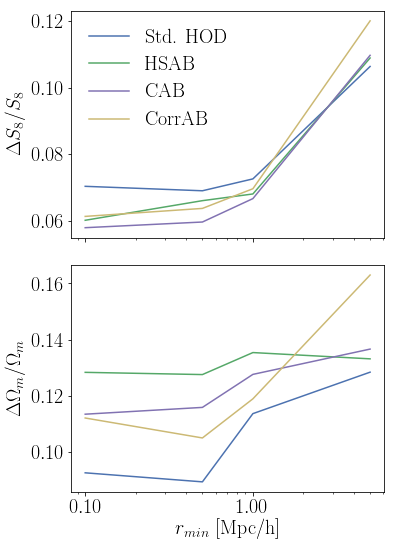

In [74]:
import matplotlib.ticker as mticker
matplotlib.rc('font', **{'size': 20})

fig, axes = plt.subplots(2,1, figsize = (6,8), sharex=True)
models = ['Std. HOD', 'HSAB', 'CAB', 'CorrAB']
for k,(ax, param, true_param) in enumerate(zip(axes,[r'$S_8$', r'$\Omega_m$'],
                                          [true_s8, true_Om])):
    for i, model  in enumerate(models):
        ax.plot(np.array(rmins), deltas[:,i,k]/true_param,
                color = model_color_map[model][0],
               label = model)
        ax.set_ylabel(r'$\Delta %s/%s$'%(param[1:-1],param[1:-1]))

    ax.set_xscale('log')
axes[1].set_xlabel(r'$r_{min}$ [Mpc/h]')
axes[0].legend(loc='best', frameon=False)
for ax in axes:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
fig.tight_layout()
fig.savefig('delta_plot.pdf', format='pdf')

In [ ]:
c.chains[0].name

In [ ]:
bic = c.comparison.bic()

for chain_name, b in zip(c.chains, bic):
    print chain_name.name,'\t', b

In [ ]:
c.diagnostic.gelman_rubin()